# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [2]:
df.shape

(100000, 11)

In [3]:
#df.pivot_table(index=['quality rating'], aggfunc='size')

In [4]:
df['quality rating'].value_counts()

10    10143
5     10124
1     10090
2     10030
8      9977
6      9961
9      9955
7      9954
4      9928
3      9838
Name: quality rating, dtype: int64

In [5]:
df['quality rating'].value_counts(normalize=True)

10    0.10143
5     0.10124
1     0.10090
2     0.10030
8     0.09977
6     0.09961
9     0.09955
7     0.09954
4     0.09928
3     0.09838
Name: quality rating, dtype: float64

👇 Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [6]:
y = (df['quality rating'] >= 6) * 1
y

0        1
1        1
2        0
3        1
4        0
        ..
99995    1
99996    1
99997    0
99998    1
99999    0
Name: quality rating, Length: 100000, dtype: int64

👇 Check the class balance of the new binary target

In [7]:
pd.DataFrame(y).value_counts(normalize=True)  # =====> definitely balanced

quality rating
0                 0.5001
1                 0.4999
dtype: float64

Create your `X` by scaling the features. This will allow for fair comparison of different solvers.

In [8]:
X = df.drop(columns='quality rating')
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06


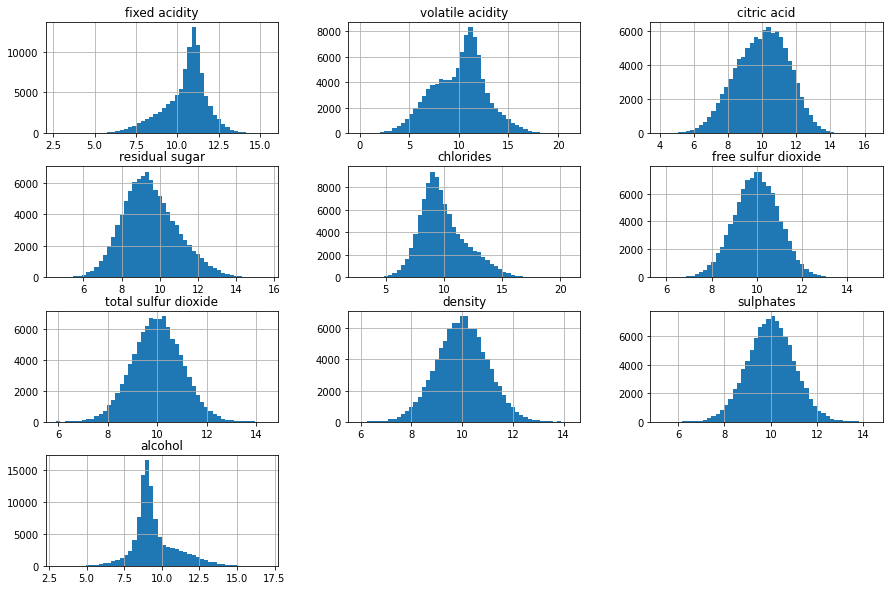

In [9]:
X.hist(bins=50, figsize=(15, 10))
plt.show()

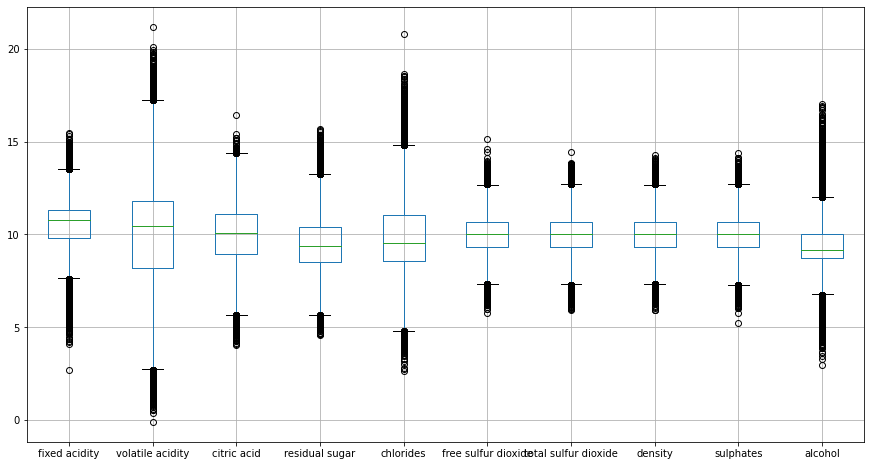

In [10]:
X.boxplot(figsize=(15, 8))
plt.show()

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality rating          0
dtype: int64

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
pd.DataFrame(scaled_X).head(3)

,0,1,2,3,4,5,6,7,8,9
0,-0.884354,-1.231405,-1.252294,0.410526,-1.088,-0.634328,-0.162963,-0.358209,0.251852,-0.282443
1,-0.489796,-0.440771,-0.151376,-0.531579,0.236,-2.305970,-0.222222,-0.738806,-0.570370,-0.282443
2,-0.122449,0.074380,0.344037,0.831579,-0.212,0.313433,1.081481,0.932836,0.992593,-0.083969


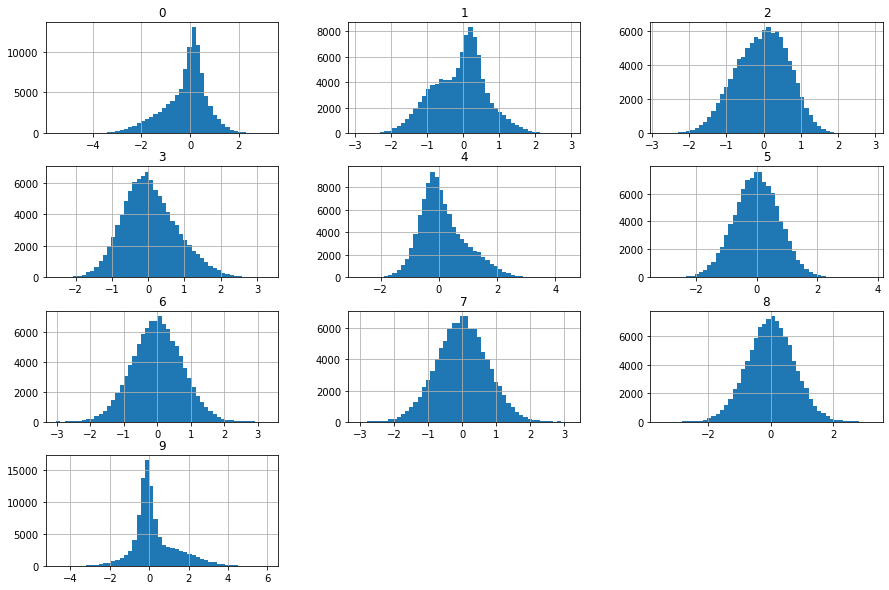

In [13]:
pd.DataFrame(scaled_X).hist(bins=50, figsize=(15, 10))
plt.show()

In [14]:
X = pd.DataFrame(data=scaled_X, columns=X.columns)
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,-0.884354,-1.231405,-1.252294,0.410526,-1.088,-0.634328,-0.162963,-0.358209,0.251852,-0.282443
1,-0.489796,-0.440771,-0.151376,-0.531579,0.236,-2.305970,-0.222222,-0.738806,-0.570370,-0.282443
2,-0.122449,0.074380,0.344037,0.831579,-0.212,0.313433,1.081481,0.932836,0.992593,-0.083969


## 2. LogisticRegression solvers

👇 Logistic Regression models can be optimized using different **solvers**. Find out 
- Which is the `fastest_solver` ?
- What can you say about their respective precision score?

`solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this stackoverflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [16]:
nt_cg = LogisticRegression(solver='newton-cg')
cv_nt_cg = cross_validate(nt_cg, X, y, cv=10, scoring=['precision'])
cv_nt_cg['fit_time'].mean(), cv_nt_cg['test_precision'].mean()

(0.7986586570739747, 0.8738641436019788)

In [17]:
lbfgs = LogisticRegression(solver='lbfgs')
cv_lbfgs = cross_validate(lbfgs, X, y, cv=10, scoring=['precision'])
cv_lbfgs['fit_time'].mean(), cv_lbfgs['test_precision'].mean()

(0.19273080825805664, 0.8738668117352582)

In [18]:
liblinear = LogisticRegression(solver='liblinear')
cv_liblinear = cross_validate(liblinear, X, y, cv=10, scoring=['precision'])
cv_liblinear['fit_time'].mean(), cv_liblinear['test_precision'].mean()

(0.35384721755981446, 0.8738668117352582)

In [19]:
sag = LogisticRegression(solver='sag')
cv_sag = cross_validate(sag, X, y, cv=10, scoring=['precision'])
cv_sag['fit_time'].mean(), cv_sag['test_precision'].mean()

(1.6105715036392212, 0.8738641436019788)

In [20]:
saga = LogisticRegression(solver='saga')
cv_saga = cross_validate(saga, X, y, cv=10, scoring=['precision'])
cv_saga['fit_time'].mean(), cv_saga['test_precision'].mean()

/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(2.7058836698532103, 0.8738641436019788)

In [21]:
# YOUR ANSWER
fastest_solver = "lbfgs"

<details>
    <summary>☝️ Intuition</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function. 

</details> 

###  🧪 Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('solvers',
                         fastest_solver=fastest_solver
                         )
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_solvers.py::TestSolvers::test_fastest_solver PASSED           [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

👇 Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2.?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [23]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
cv_SGD = cross_validate(SGD, X, y, cv=10, scoring=['precision'])
cv_SGD['fit_time'].mean(), cv_SGD['test_precision'].mean()

(0.22235574722290039, 0.8770765248427885)

☝️ The SGD model should have the shortest training time, for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single data point.

In [24]:
# ===> Well! my results show that,with respect to my coding environment, lbfgs is faster than SGDClassifier

## 4. Predictions

👇 Use the best model to predict the binary quality (0 or 1) of the following wine. Store your
- `predicted_class`
- `predicted_proba_of_class`

In [25]:
new_data = pd.read_csv('new_data.csv')

new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
pd.DataFrame(y_encoded).head(3)

,0
0,1
1,1
2,0


In [27]:
y_encoded

array([1, 1, 0, ..., 0, 1, 0])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,  test_size = 0.3)

lbfgs.fit(X_train, y_train)
lbfgs.score(X_test, y_test)

0.8592

In [29]:
lbfgs.classes_

array([0, 1])

In [30]:
predicted_class = lbfgs.predict(scaler.transform(new_data))
predicted_class

array([0])

In [31]:
predicted_proba_of_class = lbfgs.predict_proba(scaler.transform(new_data))[0][0]
predicted_proba_of_class

0.9677709006362738

# 🏁  Check your code and push your notebook

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master
